In [82]:
# Initialize Otter
import otter
grader = otter.Notebook("Linear transforms.ipynb")

# Matrix Analysis 2024 - EE312
## Week 2  - Linear transforms
[N. Aspert](https://people.epfl.ch/nicolas.aspert) - [LTS2](https://lts2.epfl.ch)

The first week notebook (introduction to Python, Numpy and Matplotlib) can be used as a help.

## Important
You need to submit *individually* your answers on moodle before the next exercise session. For the theoretical questions you can either fill the notebook or write it on a separate sheet (if you are not comfortable with Markdown/TeX) and upload a scanned version. 

## Objective

The end goal is to understand purely algebraic, matrix based, view of a few linear transforms. You will use those linear transform to perform some basic time-frequency analysis of signals.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

## Part I - Fourier

<!-- BEGIN QUESTION -->

1. Prove that any set of orthogonal vectors $v_i \in \mathbb{C}^N, \, i=1, \ldots , M \leq N$ such that $v_i^H v_j = C \delta_{i,j}$ is linearly independent (where $C$ is some constant).

Let's suppose that this set in not linearly independent and thus $v_i = \sum _{k=1, k \ne i}^{M} \alpha_k v_k$.

As such, we have $C = v_i^Hv_i = v_i^H \sum _{k=1, k \ne i}^{M} \alpha_k v_k =  \sum _{k=1, k \ne i}^{M} \alpha_k v_i^H v_k $.
Because $v_i^H v_k = 0$ for all $i\ne k$, this last sum must equal 0, yet we said it should equal $C\ne 0$.

This is a contradiction and thus, the set of vectors must be linearly independent.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

2. Compute $a_r = \sum_{n=0}^{N-1}e^{j2\pi r\frac{n}{N}}$, where $r$ is an integer (discuss the result depending on the value of $r$).

This is a geometric sum:

$a_r = \sum_{n=0}^{N-1}(e^{j2\pi \frac{r}{N}})^n = \frac{1-(e^{j2\pi \frac{r}{N}})^n}{1-e^{j2\pi \frac{r}{N}}}$

To avoid dividing by 0, we must check the condition $e^{j2\pi \frac{r}{N}} \ne 1$. This happens for $r=k\cdot N$ where $k=0,1,2,...$. 
In this case, we would get $a_r = \sum_{n=0}^{N-1} 1^n = N$.


So $ a_r = \begin{cases} N & \text{ if } r=k\cdot N  \text{ with } k \in \N  \\ \frac{1-(e^{j2\pi \frac{r}{N}})^n}{1-e^{j2\pi \frac{r}{N}}} & \text{ otherwise} \end{cases} $

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

3. Let $v_k \in \mathbb{C}^N$ be such that $v_k[n] = e^{-j 2 \pi \frac{kn}{N}}$, for $k,n = 0, \ldots , N-1$. 
- Prove that these vectors are mutually orthogonal, hence linearly independent. 
- Compute the norm of $v_k$.


Lets take two arbitrary vectors:

$    v_i = \begin{bmatrix}
           e^{-j2\pi i\frac{0}{N}} \\
           e^{-j2\pi i\frac{1}{N}} \\
           \vdots \\
           e^{-j2\pi i\frac{N-1}{N}}
         \end{bmatrix}
$
and 
$    v_j = \begin{bmatrix}
           e^{-j2\pi j\frac{0}{N}} \\
           e^{-j2\pi j\frac{1}{N}} \\
           \vdots \\
           e^{-j2\pi j\frac{N-1}{N}}
         \end{bmatrix}
$

To prove they are orthogonal we compute: 

\begin{align}
  \langle v_i, v_j \rangle = v_i^H \cdot v_j &= \begin{bmatrix}
                              e^{j2\pi i\frac{0}{N}} \\
                              e^{j2\pi i\frac{1}{N}} \\
                              \vdots \\
                              e^{j2\pi i\frac{N-1}{N}}
                            \end{bmatrix} \cdot 
                            \begin{bmatrix}
                              e^{-j2\pi j\frac{0}{N}} \\
                              e^{-j2\pi j\frac{1}{N}} \\
                              \vdots \\
                              e^{-j2\pi j\frac{N-1}{N}}
                            \end{bmatrix}\\

                                            &= \sum_{k=0}^{N-1} e^{j2\pi (i-j) \frac{k}{N}} 


\end{align}

<!-- END QUESTION -->

4. Implement the function `get_fourier_matrix` that returns a normalized Fourier matrix of size $N\times N$. Do not make use of the builtin DFT/FFT functions in `numpy` or `scipy`. Raise a `ValueError` exception if a ngetive or zero $N$ value is supplied.

In [84]:
def get_fourier_matrix(N):
    if N <=0:
        raise ValueError('N must be a positive integer')
    
    # create a matrix of size N x N
    res = np.zeros((N,N),dtype=complex)
    # fill in the matrix
    for j in range(N):
        for k in range(N):
            res[j,k] = np.exp(-2j*np.pi*j*k/N)/np.sqrt(N)

    return res


In [85]:
grader.check("q4")

q4 results: All test cases passed!
q4 - 1 message: Good, your implementation returns correct results
q4 - 2 message: Good, you did not use the scipy.linalg.dft function
q4 - 3 message: Good, you did not use the scipy.fft.fft function
q4 - 4 message: Good, you did not use the numpy.fft.fft function
q4 - 5 message: Good, your implementation returns an orthogonal matrix
q4 - 6 message: Good, you properly validated size before computing the result

Let us now generate two test signals. 

The first one $x_1(t)$ is made of four piecewise sinusoids, of different frequencies:

$$
x_1(t) = \cos(2\pi 5t), 0\le t < 2\\
x_1(t) = \cos(2\pi 10t), 2\le t < 4\\
x_1(t) = \cos(2\pi 25t), 4\le t < 6\\
x_1(t) = \cos(2\pi 50t), 6\le t < 8\\
$$


In [86]:
Fs = 256 # sampling frequency
t = np.arange(0, Fs*8)/Fs
x1 = np.zeros(Fs*8)
x1[0:Fs*2] = np.cos(2*np.pi*5*t[0:Fs*2])
x1[Fs*2:Fs*4] = np.cos(2*np.pi*10*t[Fs*2:Fs*4])
x1[Fs*4:Fs*6] = np.cos(2*np.pi*25*t[Fs*4:Fs*6])
x1[Fs*6:Fs*8] = np.cos(2*np.pi*50*t[Fs*6:Fs*8])

The second signal $x_2(t)$ is the sum of the same sinusoids over the complete time interval, with a scaling term s.t. the amplitude of both signals is identical.

In [87]:
x2 = 0.25*(np.cos(2*np.pi*5*t) + np.cos(2*np.pi*10*t) + np.cos(2*np.pi*25*t) + np.cos(2*np.pi*50*t))

<!-- BEGIN QUESTION -->

5. 
- Display the generated signals using `plt.plot`. 
- Compute their Fourier transforms using the Fourier matrix generate at the previous question.
- Display the amplitude of their Fourier spectrum. What do you observe ? 

_Type your answer here, replacing this text._

Text(0, 0.5, 'Amplitude')

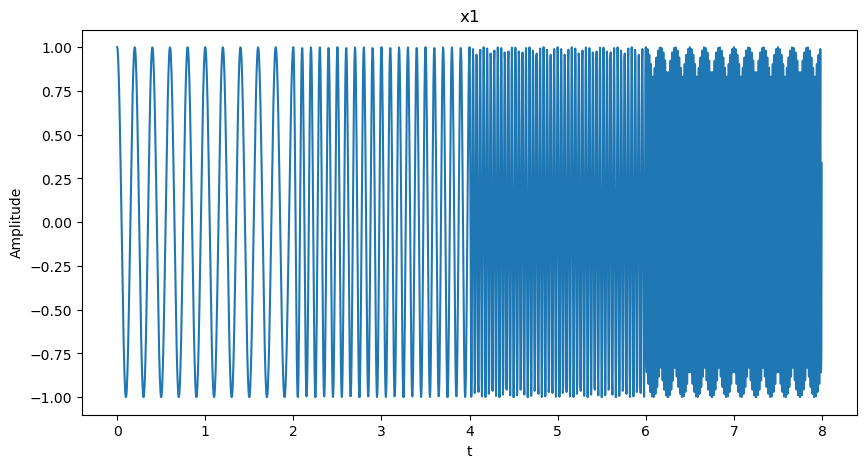

In [88]:
# plot x1
plt.figure(figsize=(10,5))
plt.plot(t,x1)
plt.title('x1')
plt.xlabel('t')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

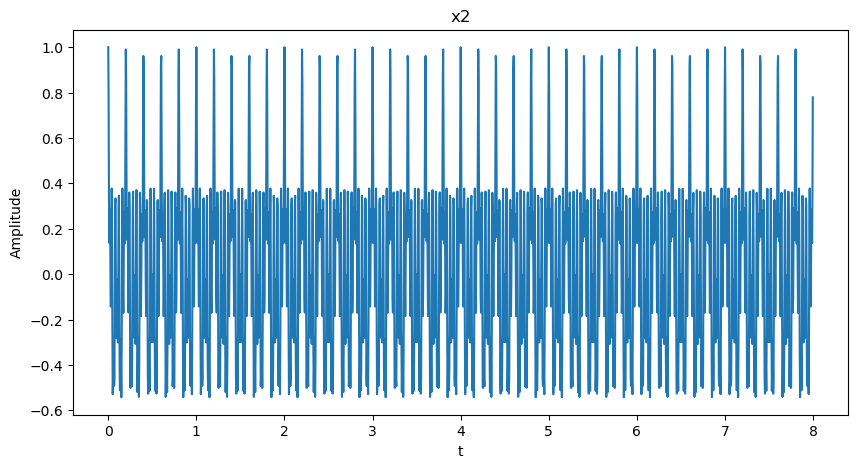

In [89]:
# plot x2
plt.figure(figsize=(10,5))
plt.plot(t,x2)
plt.title('x2')
plt.xlabel('t')
plt.ylabel('Amplitude')


In [90]:
# Compute the Fourier transform of x1 and x2
F1=get_fourier_matrix(8*Fs)@x1
F2=get_fourier_matrix(8*Fs)@x2

Text(0, 0.5, 'Amplitude')

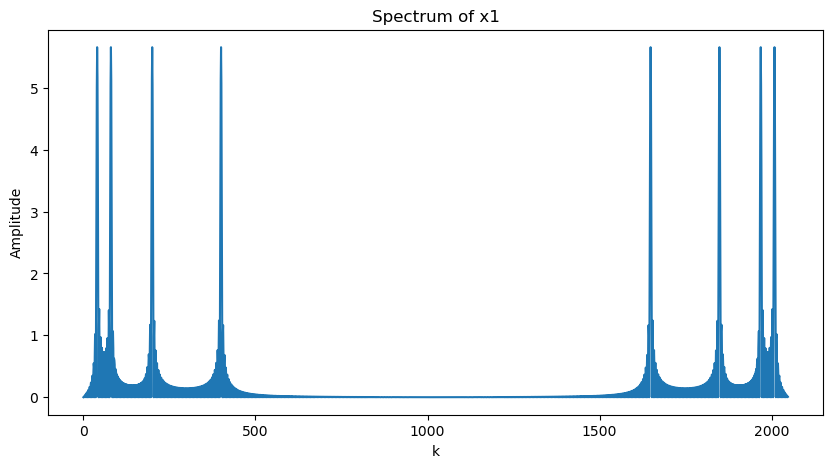

In [91]:
# Plot the spectrum of x1

plt.figure(figsize=(10,5))
plt.plot(np.abs(F1))
plt.title('Spectrum of x1')
plt.xlabel('k')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

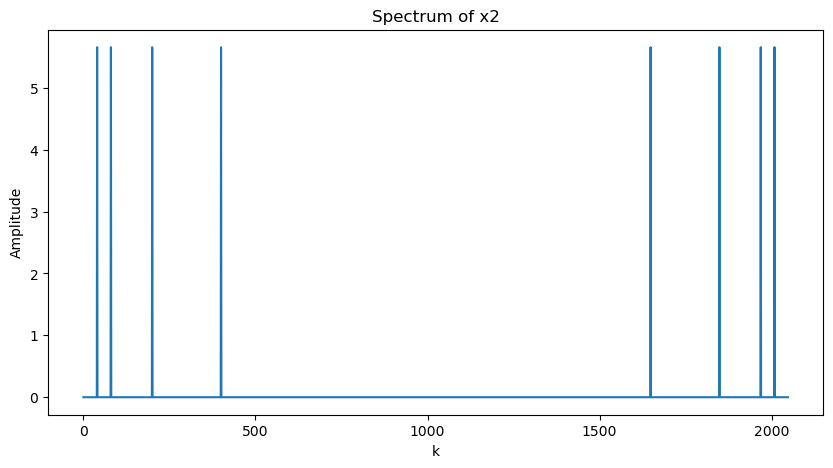

In [92]:
# Plot the spectrum of x2
plt.figure(figsize=(10,5))
plt.plot(np.abs(F2))
plt.title('Spectrum of x2')
plt.xlabel('k')
plt.ylabel('Amplitude')


<!-- END QUESTION -->

In order to have a better compromise between time and frequency, the input signal will be split in smaller non-overlapping blocks of length $p$, and we will perform the DFT of each block.

6. Using the `get_fourier_matrix` implemented previously, fill the `get_block_dft_matrix` function below s.t. it returns a $N\times N$ matrix that will perform the block Fourier transform when applied to an input vector. Raise a `ValueError` if $p$ does not divide $N$.

Hint: [numpy.pad](https://numpy.org/doc/stable/reference/generated/numpy.pad.html#numpy.pad) and/or [numpy.kron](https://numpy.org/doc/stable/reference/generated/numpy.kron.html) might prove useful.

In [93]:
def get_block_dft_matrix(N, p):
    if  N%p!=0:
        raise ValueError('N must be divisible by p')

    # create a matrix of size N x N
    A = np.eye(int(N/p),dtype=complex)
    B = get_fourier_matrix(p)
    res = np.kron(A,B)

    return res


In [94]:
grader.check("q6")

q6 results: All test cases passed!
q6 - 1 message: Good, your implementation returns an orthogonal matrix
q6 - 2 message: Good, you properly validated size before computing the result
q6 - 3 message: Good, your implementation returns the correct result

<!-- BEGIN QUESTION -->

We will now use this block Fourier transform to how the frequencies of the signal evolve through time.

7. 
- Using the `reshape` and `plt.imshow` functions, display the amplitude of the result of the block Fourier transform of $x_1$ and $x_2$. Is the result improved when compared to the one observed in question 5 ?
- What is the influence of parameter $p$ ? 


_Type your answer here, replacing this text._

In [95]:
# Compute the block DFT matrix Wb

x1 = x1.reshape(Fs,8)
x2 = x2.reshape(8*Fs,1)


Wb = get_block_dft_matrix(Fs, int(Fs/8))


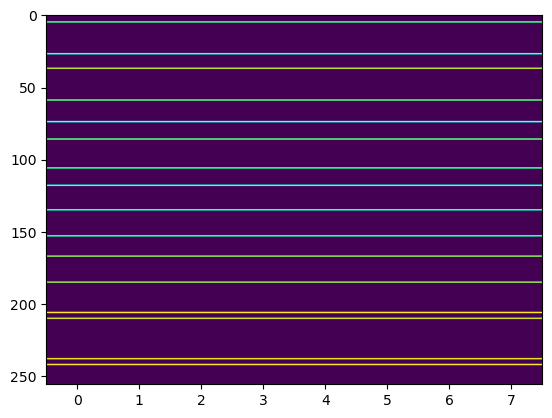

In [96]:
# Plot the block DFT of x1
F1b=Wb@x1
#plt.figure(figsize=(10,5))
plt.imshow(np.abs(F1b),aspect='auto')


In [97]:
# Plot the block DFT of x2
F2b=Wb@x2
plt.figure(figsize=(10,5))
plt.plot(np.abs(F2b))
plt.title('Block DFT of x2')
plt.xlabel('k')
plt.ylabel('Amplitude')
    

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2048 is different from 256)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

8. In a real-world application, would generating a $N\times N$ matrix to perform the block Fourier transform be a good way to implement it ? (Justify)

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Part II - Haar transform

In this part we will study another approach to study the time/frequency properties of signals. 

Let us consider a vector $x\in\mathbb{R}^N$, with $N$ being even. The single-level Haar transform decomposes $x$ into two vectors $a^1$ and $d^1$ belonging to $\mathbb{R}^{\frac{N}{2}}$. 

The coefficients of $a^1$ are defined as follows: $a^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} + x_{2n}), n=1, ..., \frac{N}{2}$. $a^1$ is referred to as the *average coefficients vector*.

The coefficients of $d^1$ are defined as follows: $d^1_n = \frac{1}{\sqrt{2}}(x_{2n-1} - x_{2n}), n=1, ..., \frac{N}{2}$. $d^1$ is referred to as the *detail coefficients vector*.


<!-- BEGIN QUESTION -->

9. Let us represent the single-level Haar transform by a matrix $H_1$ s.t. 
$$
H_1 x = \begin{pmatrix}a^1 \\ d^1\end{pmatrix}
$$
Prove that $H_1$ is orthonormal.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

10. Write a function that returns the single-level Haar transform matrix $H_1$ for a given $N$. Raise a `ValueError` if $N$ is invalid.

In [ ]:
def get_sl_haar_matrix(N):
    ...

In [ ]:
grader.check("q10")

q10 results:
    q10 - 1 message: Did you forget to validate the input size before performing the computation ?

    q10 - 1 result:
        ❌ Test case failed
        Trying:
            with np.testing.assert_raises(ValueError):
                get_sl_haar_matrix(-1)
        Expecting nothing
        **********************************************************************
        Line 1, in q10 0
        Failed example:
            with np.testing.assert_raises(ValueError):
                get_sl_haar_matrix(-1)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q10 0[0]>", line 1, in <module>
                with np.testing.assert_raises(ValueError):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 226, in __exit__
                self._raiseFailure("{} not raised".format(exc_name))
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 163, in _raiseFailure
                raise self.test_case.failureException(msg)
            AssertionError: ValueError not raised
        Trying:
            with np.testing.assert_raises(ValueError):
                get_sl_haar_matrix(0)
        Expecting nothing
        **********************************************************************
        Line 3, in q10 0
        Failed example:
            with np.testing.assert_raises(ValueError):
                get_sl_haar_matrix(0)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q10 0[1]>", line 1, in <module>
                with np.testing.assert_raises(ValueError):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 226, in __exit__
                self._raiseFailure("{} not raised".format(exc_name))
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 163, in _raiseFailure
                raise self.test_case.failureException(msg)
            AssertionError: ValueError not raised
        Trying:
            with np.testing.assert_raises(ValueError):
                get_sl_haar_matrix(3)
        Expecting nothing
        **********************************************************************
        Line 5, in q10 0
        Failed example:
            with np.testing.assert_raises(ValueError):
                get_sl_haar_matrix(3)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q10 0[2]>", line 1, in <module>
                with np.testing.assert_raises(ValueError):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 226, in __exit__
                self._raiseFailure("{} not raised".format(exc_name))
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 163, in _raiseFailure
                raise self.test_case.failureException(msg)
            AssertionError: ValueError not raised

    q10 - 2 message: Results seem incorrect, check your implementation

    q10 - 2 result:
        ❌ Test case failed
        Trying:
            np.testing.assert_array_almost_equal(get_sl_haar_matrix(2), np.array([[1, 1], [1, -1]]) / np.sqrt(2))
        Expecting nothing
        **************************************************************

The multi-level Haar transform is defined by recursively applying the single-level transform **to the average coefficient parts**. 

For instance constructing 2-level Haar transform over $N$ points start with the previously defined $H_{1,N}$ matrix of size $N\times N$ and the corresponding $\frac{N}{2}\times\frac{N}{2}$ version denoted by $H_{1,\frac{N}{2}}$. 

$H_{1,N}$ can be written as
$$
\begin{pmatrix} H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$
where $H_{1, N}^a$ and $H_{1,N}^d$ are respectively the average and detail coefficient matrices, both of size $\frac{N}{2}\times N$.

Following these notations, the 2-level Haar transform matrix $H_{2,N}$ can be written as:
$$
\begin{pmatrix} H_{1,\frac{N}{2}}H_{1, N}^a \\ H_{1,N}^d \end{pmatrix},
$$

11. Implement a function that returns the $H_{p,N}$ matrix of size $N\times N$ that performs a $p$-level haar transform. Raise a `ValueError` if the size and the level are incompatible, or if the level is smaller than 1.

In [ ]:
def get_haar_matrix(N, level):
    ...

In [ ]:
grader.check("q11")

q11 results:
    q11 - 1 message: Did you forget to validate the input size before performing the computation ?

    q11 - 1 result:
        ❌ Test case failed
        Trying:
            with np.testing.assert_raises(ValueError):
                get_haar_matrix(-1, 0)
        Expecting nothing
        **********************************************************************
        Line 1, in q11 0
        Failed example:
            with np.testing.assert_raises(ValueError):
                get_haar_matrix(-1, 0)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q11 0[0]>", line 1, in <module>
                with np.testing.assert_raises(ValueError):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 226, in __exit__
                self._raiseFailure("{} not raised".format(exc_name))
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 163, in _raiseFailure
                raise self.test_case.failureException(msg)
            AssertionError: ValueError not raised
        Trying:
            with np.testing.assert_raises(ValueError):
                get_haar_matrix(16, 0)
        Expecting nothing
        **********************************************************************
        Line 3, in q11 0
        Failed example:
            with np.testing.assert_raises(ValueError):
                get_haar_matrix(16, 0)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q11 0[1]>", line 1, in <module>
                with np.testing.assert_raises(ValueError):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 226, in __exit__
                self._raiseFailure("{} not raised".format(exc_name))
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 163, in _raiseFailure
                raise self.test_case.failureException(msg)
            AssertionError: ValueError not raised
        Trying:
            with np.testing.assert_raises(ValueError):
                get_haar_matrix(4, 3)
        Expecting nothing
        **********************************************************************
        Line 5, in q11 0
        Failed example:
            with np.testing.assert_raises(ValueError):
                get_haar_matrix(4, 3)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q11 0[2]>", line 1, in <module>
                with np.testing.assert_raises(ValueError):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 226, in __exit__
                self._raiseFailure("{} not raised".format(exc_name))
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/unittest/case.py", line 163, in _raiseFailure
                raise self.test_case.failureException(msg)
            AssertionError: ValueError not raised

    q11 - 2 message: Results seem incorrect, check your implementation

    q11 - 2 result:
        ❌ Test case failed
        Trying:
            H = get_haar_matrix(4, 2)
        Expecting nothing
        ok
        Trying:
            a = 1 / np.sqrt(2)
        Expecting nothing
        ok
        Trying:
            np.testing.assert_arr

<!-- BEGIN QUESTION -->

12. Prove that $H_{p,N}$ is orthonormal.

_Type your answer here, replacing this text._

<!-- END QUESTION -->

### Haar transform visualization

In order to make the visualization of the Haar decomposition easy, we provide you the `plot_haar_coeffs` function that will display the average and detail coefficients of the different levels. 

The function takes 2 arguments:
- the input signal
- the number of levels


<!-- BEGIN QUESTION -->

13. Display the Haar transform of $x1$ and $x2$.

In [ ]:
from display_helper import plot_haar_coeffs

In [ ]:
# display the decomposition of x1
...

In [ ]:
# display the decomposition of x2
...

<!-- END QUESTION -->

## Part III - Denoising

We will now use the different transforms defined in part I and II to perform denoising.
Let us create a noisy signal for this purpose.

In [ ]:
angle1 = np.linspace(0, 5*np.pi/2, 300)
wave1  = np.sin(angle1)
angle2 = np.linspace(0, 3*np.pi/2, 300)
wave2  = np.sin(angle2)
angle3 = np.linspace(np.pi/2, 2*np.pi, 424)
wave3  = np.sin(angle3)
wave   = np.append(wave1, wave2)
wave   = np.append(wave, wave3)
wave_noisy = wave + 0.2*np.random.normal(0, 1, 1024)

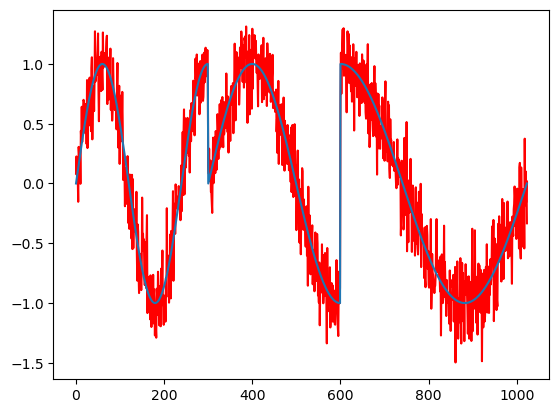

In [ ]:
plt.plot(wave_noisy, 'r')
plt.plot(wave)

The noise is usually located in the higher frequencies. However, the signal we created is a bit special as it has two discontinuities which also generate high frequencies components (remember the Fourier transform of a rectangle function is a sinc). 

<!-- BEGIN QUESTION -->

14. Implement a function `denoise_signal` that perform denoising of the input signal by using a supplied orthonormal transform matrix, and by setting the transformed coefficients having an amplitude smaller than a given threshold to 0. You might want to use the [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function for this. When denoising using the Haar transform, you can preform the thresholding only on the detail coefficients. Implement the function `denoise_signal_haar` that performs this operation.

NB: The result returned should be real, in order to be displayed. 

In [ ]:
def denoise_signal(W, x, threshold=0.1):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    """
    ...

In [ ]:
def denoise_signal_haar(W, x, threshold=0.1, detail_start_index=256):
    """
    W: NxN input orthonormal matrix (Fourier, block-Fourier or Haar)
    x: input signal (of length N)
    detail_start_index: thresholding is performed on x[detail_start_index:]
    """
    ...

In [ ]:
# Perform denoising with the full Fourier transform and display the result. 
# Make sure you choose a good threshold
...

Ellipsis

In [ ]:
# Perform denoising with the block Fourier transform and display the result
# Make sure you choose a good threshold and block size
...

Ellipsis

In [ ]:
# Perform denoising with the Haar transform and display the result
# Make sure you choose a good threshold and an appropriate number of levels
...

Ellipsis

In [ ]:
grader.check("q14")

q14 results:
    q14 - 1 message: Results seem incorrect, check your implementation

    q14 - 1 result:
        ❌ Test case failed
        Trying:
            waverec = denoise_signal(get_fourier_matrix(len(wave_noisy)), wave_noisy, 0.0)
        Expecting nothing
        ok
        Trying:
            np.testing.assert_array_almost_equal(waverec, wave_noisy)
        Expecting nothing
        **********************************************************************
        Line 2, in q14 0
        Failed example:
            np.testing.assert_array_almost_equal(waverec, wave_noisy)
        Exception raised:
            Traceback (most recent call last):
              File "/home/mikey/miniconda3/envs/matrix-analysis-2024/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q14 0[1]>", line 1, in <module>
                np.testing.assert_array_almost_equal(waverec, wave_noisy)
              File "/home/mikey/.local/lib/python3.10/site-packages/numpy/testing/_private/utils.py", line 1046, in assert_array_almost_equal
                assert_array_compare(compare, x, y, err_msg=err_msg, verbose=verbose,
              File "/home/mikey/.local/lib/python3.10/site-packages/numpy/testing/_private/utils.py", line 792, in assert_array_compare
                val = comparison(x, y)
              File "/home/mikey/.local/lib/python3.10/site-packages/numpy/testing/_private/utils.py", line 1039, in compare
                z = abs(x - y)
            TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

15. Compare the three denoising methods (Fourier, block Fourier and Haar). Which one performs better (in terms of noise removal but also in terms of discontinuity preservation) ? Was that expected (justify) ?

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Upload your notebook and separate pdf for theoretical questions if needed

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...




Your submission received the following results when run against available test cases:

    q4 results: All test cases passed!
    q4 - 1 message: Good, your implementation returns correct results
    q4 - 2 message: Good, you did not use the scipy.linalg.dft function
    q4 - 3 message: Good, you did not use the scipy.fft.fft function
    q4 - 4 message: Good, you did not use the numpy.fft.fft function
    q4 - 5 message: Good, your implementation returns an orthogonal matrix
    q4 - 6 message: Good, you properly validated size before computing the result

    q6 results: All test cases passed!
    q6 - 1 message: Good, your implementation returns an orthogonal matrix
    q6 - 2 message: Good, you properly validated size before computing the result
    q6 - 3 message: Good, your implementation returns the correct result

    q10 results:
        q10 - 1 message: Did you forget to validate the input size before performing the computation ?

        q10 - 1 result:
            ❌ Test c